In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

In [3]:
cricket = pd.read_csv('Cricket.csv', encoding='ISO-8859-1')
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
df = cricket[['Ave', 'SR']]
df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [5]:
scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(df)
rfm_df_scaled.shape # n-d numpy array

(79, 2)

In [6]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['avg', 'sr']
rfm_df_scaled.head()

,avg,sr
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [7]:
kmeans= KMeans(n_clusters = 4, max_iter = 50, random_state=100)

In [8]:
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [9]:
print(len(kmeans.labels_))
print(kmeans.labels_)
print(np.unique(kmeans.labels_))

79
[2 0 0 1 3 0 0 0 0 0 1 0 1 2 3 2 3 1 0 0 1 0 3 0 1 2 3 1 3 0 3 3 0 3 2 3 3
 0 2 0 3 3 2 3 3 3 0 3 3 0 1 0 3 3 3 3 0 1 3 1 3 1 0 2 2 0 0 3 0 3 0 3 3 3
 0 0 3 1 3]
[0 1 2 3]


In [10]:
cricket['cluster_id'] = kmeans.labels_
cricket

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,0
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,0
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,3
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1


In [11]:
c = cricket.loc[(cricket['Player'].str.contains('Kohli'))]['cluster_id'][25]

In [12]:
cricket.iloc[:1, :1].Player

0    SR Tendulkar (INDIA)
Name: Player, dtype: object

In [13]:
r = cricket['Player']
r[0]

'SR Tendulkar\xa0(INDIA)'

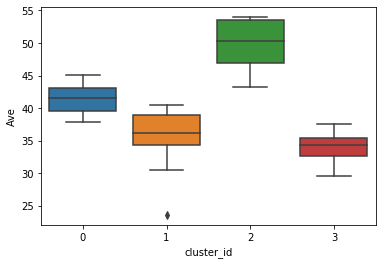

In [14]:
sns.boxplot(x='cluster_id', y='Ave', data=cricket)

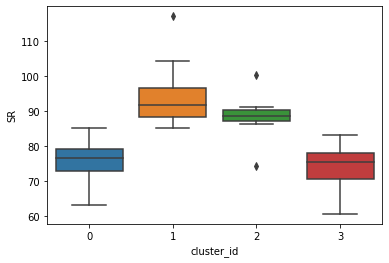

In [15]:
# plots 
sns.boxplot(x='cluster_id', y='SR', data=cricket)

In [17]:
cricket.loc[(cricket['Player'].str.contains('Tendulkar') |cricket['Player'].str.contains(' Dravid')|cricket['Player'].str.contains('Richards')|cricket['Player'].str.contains('Gayle')|cricket['Player'].str.contains('Guptill'))]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,1
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,2
47,RB Richardson (WI),1983-1996,224,217,30,6248,122,33.41,9801,63.74,5,44,8,3
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,2
